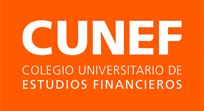

# Máster en Data Science - Machine Learning

# Exploratory Data Analysis
##### <font color='dodgerblue' face='Montserrat'>Autor: Rodrigo Fernandez Campos</font>
## DataSet: Bank Account Fraud Dataset Suite (NeurIPS 2022)

# <font size=25><b>Procesamiento de variables: Ingeniería y Selección</b></font>

In [28]:
# Librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored, cprint
import category_encoders as ce
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
import sys

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel, RFE
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

import pickle
from joblib import dump, load

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

## Funciones

In [2]:
sys.path.append('../src/')
import functions_rfc as fr
sys.path.remove('../src/')

#### Constantes
seed=10

## Importación del preprocesamiento anterior

In [3]:
df_fraud_train = pd.read_csv('../data/interim/df_fraud_train.csv')
df_fraud_test = pd.read_csv('../data/interim/df_fraud_test.csv')
df_fraud_train.head()

,Unnamed: 0,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,month,fraud_bool
0,593143,0.8,0.433984,54,9,30,0.020608,49.172739,AA,954,5137.541683,2712.051960,4240.496920,2,11,CA,286,0,BA,0,1,1,1,1000.0,0,INTERNET,14.396148,other,0,1,6,0
1,566593,0.1,0.712826,-1,97,50,0.024353,-1.091855,AB,1108,4370.169334,3097.535634,4383.873312,0,6,CA,132,0,BB,1,1,28,1,200.0,0,INTERNET,4.100053,other,0,1,6,0
2,824376,0.4,0.222290,32,115,30,0.002837,-1.067640,AC,266,7168.731474,2865.219877,4207.649556,0,11,CA,171,0,BE,0,1,-1,1,200.0,0,INTERNET,2.369306,other,0,1,5,0
3,426074,0.7,0.476667,-1,375,40,0.020157,-0.930885,AC,962,4761.030105,6249.502233,6013.337906,0,8,CA,245,1,BA,0,1,-1,1,1500.0,1,INTERNET,31.700024,linux,1,1,1,0
4,305196,0.1,0.506995,11,10,20,0.007662,-0.698526,AC,874,8823.184279,6315.937497,5653.839202,0,13,CD,20,0,BC,0,1,-1,0,200.0,0,INTERNET,0.592456,linux,1,1,2,0


In [4]:
df_fraud_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 32 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Unnamed: 0                        700000 non-null  int64  
 1   income                            700000 non-null  float64
 2   name_email_similarity             700000 non-null  float64
 3   prev_address_months_count         700000 non-null  int64  
 4   current_address_months_count      700000 non-null  int64  
 5   customer_age                      700000 non-null  int64  
 6   days_since_request                700000 non-null  float64
 7   intended_balcon_amount            700000 non-null  float64
 8   payment_type                      700000 non-null  object 
 9   zip_count_4w                      700000 non-null  int64  
 10  velocity_6h                       700000 non-null  float64
 11  velocity_24h                      700000 non-null  f

In [5]:
# Elimino la primera columna que repite el Index
df_fraud_train = df_fraud_train.drop('Unnamed: 0',axis=1)
df_fraud_test = df_fraud_test.drop('Unnamed: 0',axis=1)

In [6]:
# Descripción de los datos:
var_description = pd.read_excel('../data/interim/variables_description.xlsx')
var_description

,Variable,Type,Description,Possible Values / Range,Missings
0,fraud_bool,binary,TARGET - If the application is fraudulent or not.,[1 0],NaN
1,income,numeric,Annual income of the applicant (in decile form).,[0.1 to 0.9],NaN
2,name_email_similarity,numeric,Metric of similarity between email and applic...,[0.00 to 1.00],NaN
3,prev_address_months_count,numeric,Number of months in previous registered addre...,[-1.00 to 383.00],-1
4,current_address_months_count,numeric,Months in currently registered address of the...,[-1.00 to 429.00],-1
5,customer_age,numeric,"Applicant’s age in years, rounded to the decade.",[10 20 30 40 50 60 70 80 90],NaN
6,days_since_request,numeric,Number of days passed since application was d...,[0.00 to 79],NaN
7,intended_balcon_amount,numeric,Initial transferred amount for application.,[-16 to 114],Negatives
8,payment_type,categorical,Credit payment plan type. 5 possible (annonym...,['AA' 'AB' 'AC' 'AD' 'AE'],NaN
9,zip_count_4w,numeric,Number of applications within same zip code i...,[1.00 to 6700.00],NaN


***

# Feature Engineering

No serán tantas las transformaciones que realicemos a las variables en este dataset, en parte debido a que los datos raw que descargamos ya cuentan con codificaciones y/o transformaciones derivadas de un proceso en el que se anonimizaron las instancias.

Aún así, procederemos a encodificar las variables de tipo string, debido a que nuestros modelos necesitan que todos los input sean numéricos.

Luego también aplicaremos un escalado, debido a que para aplicar modelos de regresión o de reducción de dimensiones necesitaremos los datos pasados por una transformación de este estilo.

## Cambio de tipo a variables categoricas

Cambio el tipo de las variables categóricas de texto a 'category'

In [7]:
# vuelvo a generar mis listas por tipos de variables
df_fraud_bool, df_fraud_cat, df_fraud_num = fr.tipos_vars(df_fraud_train,False)

In [8]:
# Listado de variables categóricas String: Las variables a codificar
df_fraud_cat_string = list(df_fraud_train[df_fraud_cat].select_dtypes('object').columns.values)
df_fraud_cat_string

['payment_type', 'employment_status', 'housing_status', 'source', 'device_os']

In [9]:
# Visualizo los detalles de todas las variables categóricas a codificar 
fr.dame_info(df_fraud_cat_string, df_fraud_train, var_description)

 1. payment_type  :  Credit payment plan type. 5 possible (annonymized) values. 
- Nulls: 0
- Values: ['AA' 'AB' 'AC' 'AD' 'AE'] 

 2. employment_status  :  Employment status of the applicant. 7 possible (annonymized) values. 
- Nulls: 0
- Values: ['CA' 'CD' 'CE' 'CB' 'CC' 'CF' 'CG'] 

 3. housing_status  :  Current residential status for applicant. 7 possible (annonymized) values. 
- Nulls: 0
- Values: ['BA' 'BB' 'BE' 'BC' 'BD' 'BF' 'BG'] 

 4. source  :  Online source of application. Either browser (INTERNET) or app (TELEAPP). 
- Nulls: 0
- Values: ['INTERNET' 'TELEAPP'] 

 5. device_os  :  Operative system of device that made request (Windows, macOS, Linux, X11, or other). 
- Nulls: 0
- Values: ['other' 'linux' 'windows' 'macintosh' 'x11'] 



## Codificación de variables

A pesar de ya haberlo mencionado con anterioridad, he de recalcar que existen una serie de variables en el dataset, ya mostradas en notebooks anteriores, que poseen valores numéricos, pero cuya naturaleza sería el de una categoría. Para el análisis descriptivo así fueron tenidos en cuenta, pero no se modificó su tipo debido a que en el modelo serán procesadas en su actual estado numérico. Ninguna posee valores nulos, ya que los missings están ya bien codificados en valores negativos. Además, todas ellas ya tienen un orden establecido por los creadores del DataSet, por lo que están listas para ser procesadas.

No sucede lo mismo con las variables que voy a codificar a continuación. A simple vista se puede observar que habrá un boolean y que se podría hacer OneHotEncoding a las demás variables debido a que poseen pocas categorías. De igual manera, la idea es aprender el uso de diferentes métodos de códificación, por lo que utilizaré tanto codificación manual como One Hot Encoding y Ordinal Encoding. También existe la posibilidad de hacer un Mean Encoding pero en este caso hay pocas categorías. Aún así no descarto hacerlo próximamente si algún modelo lo requiere.

El reparto será:

1. *'source'*: encoding manual, a tipo boolean
2. *'device_os'*: **One Hot Encoding**
3. *'payment_type','employment_status' & 'housing_status'*: **Ordinal Encoding**. (Los códigos pareciesen tener un orden categórico ascendente)

### 1. Encoding manual 

In [10]:
# Comienzo por la variable Source, cuyos valores son solo 2
    # Optaré por transformar al valor 'INTERNET' en el valor por defecto, es decir 0 (la gran mayoría de las instancias tendrán este valor)
    # Mientras que el valor 'TELEAPP' se corresponderá con el 1.
df_fraud_train.source.value_counts(normalize=True)

source
INTERNET    0.992976
TELEAPP     0.007024
Name: proportion, dtype: float64

In [11]:
df_fraud_train.loc[df_fraud_train['source'] == 'INTERNET','source'] = 0
df_fraud_train.loc[df_fraud_train['source'] == 'TELEAPP','source'] = 1

df_fraud_test.loc[df_fraud_test['source'] == 'INTERNET','source'] = 0
df_fraud_test.loc[df_fraud_test['source'] == 'TELEAPP','source'] = 1

In [12]:
df_fraud_train.source.value_counts(normalize=True)

source
0    0.992976
1    0.007024
Name: proportion, dtype: float64

In [13]:
df_fraud_train.source.dtype

dtype('O')

In [14]:
df_fraud_train['source'] = df_fraud_train.source.astype('int64')
df_fraud_test['source'] = df_fraud_test.source.astype('int64')
df_fraud_train.source.dtype

dtype('int64')

### 2. One Hot Encoding

In [15]:
ohe = ce.OneHotEncoder(cols=['device_os'],use_cat_names=True)
model_ohe = ohe.fit(df_fraud_train)
model_ohe

OneHotEncoder(cols=['device_os'], use_cat_names=True)

In [16]:
df_fraud_train_t = model_ohe.transform(df_fraud_train)
df_fraud_test_t = model_ohe.transform(df_fraud_test)

In [17]:
df_fraud_train_t.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os_other,device_os_linux,device_os_windows,device_os_macintosh,device_os_x11,keep_alive_session,device_distinct_emails_8w,month,fraud_bool
0,0.8,0.433984,54,9,30,0.020608,49.172739,AA,954,5137.541683,2712.051960,4240.496920,2,11,CA,286,0,BA,0,1,1,1,1000.0,0,0,14.396148,1,0,0,0,0,0,1,6,0
1,0.1,0.712826,-1,97,50,0.024353,-1.091855,AB,1108,4370.169334,3097.535634,4383.873312,0,6,CA,132,0,BB,1,1,28,1,200.0,0,0,4.100053,1,0,0,0,0,0,1,6,0
2,0.4,0.222290,32,115,30,0.002837,-1.067640,AC,266,7168.731474,2865.219877,4207.649556,0,11,CA,171,0,BE,0,1,-1,1,200.0,0,0,2.369306,1,0,0,0,0,0,1,5,0
3,0.7,0.476667,-1,375,40,0.020157,-0.930885,AC,962,4761.030105,6249.502233,6013.337906,0,8,CA,245,1,BA,0,1,-1,1,1500.0,1,0,31.700024,0,1,0,0,0,1,1,1,0
4,0.1,0.506995,11,10,20,0.007662,-0.698526,AC,874,8823.184279,6315.937497,5653.839202,0,13,CD,20,0,BC,0,1,-1,0,200.0,0,0,0.592456,0,1,0,0,0,1,1,2,0


#### Aclaración importante:
Un tema no menor a tener en cuenta es que, mediante este tipo de codificación, han persistido TODAS las categorías de la variable 'device_os', cada una en una nueva columa. Esto implica que a la hora de hacer un modelo, por ejemplo de Regresión, **habrá que modificar el DF**, eliminando una de las columnas, ya que de no hacerlo se estaría produciendo un sesgo debido a una duplicidad de la información que ingresemos al modelo.

A la hora de aplicar los modelos que vayamos a aplicar, entonces, se tendrá en cuenta esto y se realizaran las modificaciones pertinentes.

### 3. Ordinal Encoding

In [18]:
for i in ['payment_type', 'employment_status', 'housing_status']:
    print(df_fraud_train_t[i].value_counts(normalize=True))

payment_type
AB    0.369940
AA    0.258716
AC    0.251993
AD    0.119060
AE    0.000291
Name: proportion, dtype: float64
employment_status
CA    0.730697
CB    0.138030
CF    0.043989
CC    0.037756
CD    0.026490
CE    0.022581
CG    0.000457
Name: proportion, dtype: float64
housing_status
BC    0.372193
BB    0.260929
BA    0.169553
BE    0.169273
BD    0.026064
BF    0.001727
BG    0.000261
Name: proportion, dtype: float64


In [19]:
# Defino que variables vamos a codificar:
df_cat_oe=df_fraud_train_t[['payment_type', 'employment_status', 'housing_status']]
ordinal_encoder = OrdinalEncoder()
model_oe = ordinal_encoder.fit(df_cat_oe)
model_oe

OrdinalEncoder()

In [20]:
df_cat_oe_test = df_fraud_test_t[['payment_type', 'employment_status', 'housing_status']]
df_fraud_train_t[['payment_type', 'employment_status', 'housing_status']] = pd.DataFrame(model_oe.transform(df_cat_oe),columns=df_cat_oe.columns)
df_fraud_test_t[['payment_type', 'employment_status', 'housing_status']] = pd.DataFrame(model_oe.transform(df_cat_oe_test),columns=df_cat_oe_test.columns)
df_fraud_train_t.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os_other,device_os_linux,device_os_windows,device_os_macintosh,device_os_x11,keep_alive_session,device_distinct_emails_8w,month,fraud_bool
0,0.8,0.433984,54,9,30,0.020608,49.172739,0.0,954,5137.541683,2712.051960,4240.496920,2,11,0.0,286,0,0.0,0,1,1,1,1000.0,0,0,14.396148,1,0,0,0,0,0,1,6,0
1,0.1,0.712826,-1,97,50,0.024353,-1.091855,1.0,1108,4370.169334,3097.535634,4383.873312,0,6,0.0,132,0,1.0,1,1,28,1,200.0,0,0,4.100053,1,0,0,0,0,0,1,6,0
2,0.4,0.222290,32,115,30,0.002837,-1.067640,2.0,266,7168.731474,2865.219877,4207.649556,0,11,0.0,171,0,4.0,0,1,-1,1,200.0,0,0,2.369306,1,0,0,0,0,0,1,5,0
3,0.7,0.476667,-1,375,40,0.020157,-0.930885,2.0,962,4761.030105,6249.502233,6013.337906,0,8,0.0,245,1,0.0,0,1,-1,1,1500.0,1,0,31.700024,0,1,0,0,0,1,1,1,0
4,0.1,0.506995,11,10,20,0.007662,-0.698526,2.0,874,8823.184279,6315.937497,5653.839202,0,13,3.0,20,0,2.0,0,1,-1,0,200.0,0,0,0.592456,0,1,0,0,0,1,1,2,0


In [21]:
for i in ['payment_type', 'employment_status', 'housing_status']:
    print(df_fraud_train_t[i].value_counts(normalize=True))

payment_type
1.0    0.369940
0.0    0.258716
2.0    0.251993
3.0    0.119060
4.0    0.000291
Name: proportion, dtype: float64
employment_status
0.0    0.730697
1.0    0.138030
5.0    0.043989
2.0    0.037756
3.0    0.026490
4.0    0.022581
6.0    0.000457
Name: proportion, dtype: float64
housing_status
2.0    0.372193
1.0    0.260929
0.0    0.169553
4.0    0.169273
3.0    0.026064
5.0    0.001727
6.0    0.000261
Name: proportion, dtype: float64


In [22]:
model_oe.categories_

[array(['AA', 'AB', 'AC', 'AD', 'AE'], dtype=object),
 array(['CA', 'CB', 'CC', 'CD', 'CE', 'CF', 'CG'], dtype=object),
 array(['BA', 'BB', 'BC', 'BD', 'BE', 'BF', 'BG'], dtype=object)]

In [23]:
df_fraud_train_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700000 entries, 0 to 699999
Data columns (total 35 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   income                            700000 non-null  float64
 1   name_email_similarity             700000 non-null  float64
 2   prev_address_months_count         700000 non-null  int64  
 3   current_address_months_count      700000 non-null  int64  
 4   customer_age                      700000 non-null  int64  
 5   days_since_request                700000 non-null  float64
 6   intended_balcon_amount            700000 non-null  float64
 7   payment_type                      700000 non-null  float64
 8   zip_count_4w                      700000 non-null  int64  
 9   velocity_6h                       700000 non-null  float64
 10  velocity_24h                      700000 non-null  float64
 11  velocity_4w                       700000 non-null  f

##### Como se puede ver, todas las variables categóricas de nuestro DataSet ya son de tipo numéricas y están listas para ser escaladas y/o procesadas.

### Separación X e y

Vuelvo a separar mis Data Frames importados en X e y, ya que no quiero escalar mi variable target.

In [24]:
y_train = df_fraud_train_t['fraud_bool']
X_train = df_fraud_train_t.drop('fraud_bool', axis=1)
y_test = df_fraud_test_t['fraud_bool']
X_test = df_fraud_test_t.drop('fraud_bool', axis=1)

X_train.shape,y_train.shape,y_test.shape,X_test.shape

((700000, 34), (700000,), (300000,), (300000, 34))

In [29]:
#pd.concat([X_train,y_train], axis=1).to_csv('../data/processed/df_fraud_train_processed.csv') # luego separaré nuevamente en X e y a la hora de modelar.
#pd.concat([X_test,y_test], axis=1).to_csv('../data/processed/df_fraud_test_processed.csv') # lo mismo aplica para el test, se separará luego para no guardar dos csv separados.

## Escalado de variables

Como se ha comentado con anterioridad, procedemos a realizar un escalado de variables, para luego aplicar técnicas de reducción de dimensiones y de regresión.

In [26]:
scaler = StandardScaler()
model_scaled = scaler.fit(X_train)
X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns, index=X_train.index)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns, index=X_test.index)

In [27]:
X_train_scaled.describe()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os_other,device_os_linux,device_os_windows,device_os_macintosh,device_os_x11,keep_alive_session,device_distinct_emails_8w,month
count,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05,7.000000e+05
mean,-3.897225e-16,5.638461e-16,-1.652519e-17,2.080875e-17,-1.728040e-16,5.469149e-17,8.285943e-17,1.203456e-16,1.088348e-16,-3.161966e-16,3.927576e-16,-2.773497e-15,-2.283887e-18,4.468299e-17,-1.374596e-16,6.347431e-17,9.290854e-17,4.191187e-17,-4.420591e-17,-4.445967e-17,-5.765547e-17,4.141449e-17,3.095936e-17,-5.982262e-17,-3.573015e-17,-2.235672e-16,3.367973e-17,-2.208773e-17,-3.201503e-17,-2.464568e-17,-2.629008e-17,5.004759e-17,3.002246e-16,-8.876709e-18
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.594075e+00,-1.707730e+00,-4.023849e-01,-9.909203e-01,-1.969345e+00,-1.906738e-01,-1.195904e+00,-1.273961e+00,-1.563271e+00,-1.940562e+00,-2.347267e+00,-2.208800e+00,-4.010217e-01,-1.888629e+00,-4.735604e-01,-4.323292e+00,-1.061572e+00,-1.395809e+00,-8.463876e-01,-2.837068e+00,-9.777920e-01,-5.357603e-01,-6.681005e-01,-1.610502e-01,-8.410693e-02,-1.062227e+00,-7.221594e-01,-7.058631e-01,-5.981019e-01,-2.388492e-01,-8.542335e-02,-1.166863e+00,-1.116987e+01,-1.487511e+00
25%,-9.052048e-01,-9.291921e-01,-4.023849e-01,-7.646969e-01,-1.138096e+00,-1.893374e-01,-4.868491e-01,-1.273961e+00,-6.741084e-01,-7.412049e-01,-7.952635e-01,-6.399373e-01,-3.988445e-01,-6.961885e-01,-4.735604e-01,-6.895696e-01,-1.061572e+00,-6.075737e-01,-8.463876e-01,3.524766e-01,-9.777920e-01,-5.357603e-01,-6.475783e-01,-1.610502e-01,-8.410693e-02,-5.520358e-01,-7.221594e-01,-7.058631e-01,-5.981019e-01,-2.388492e-01,-8.542335e-02,-1.166863e+00,-1.015048e-01,-1.035046e+00
50%,1.281003e-01,-5.390576e-03,-4.023849e-01,-3.914283e-01,-3.068482e-01,-1.878494e-01,-4.695195e-01,-2.401296e-01,-3.080996e-01,-1.144208e-01,-1.243392e-02,6.164042e-02,-3.814267e-01,-9.996825e-02,-4.735604e-01,-1.294306e-01,9.419991e-01,1.806612e-01,-8.463876e-01,3.524766e-01,-4.826397e-01,-5.357603e-01,-6.475783e-01,-1.610502e-01,-8.410693e-02,-3.026301e-01,-7.221594e-01,-7.058631e-01,-5.981019e-01,-2.388492e-01,-8.542335e-02,8.569985e-01,-1.015048e-01,-1.301172e-01
75%,8.169704e-01,9.058125e-01,-1.077248e-01,4.908430e-01,5.244001e-01,-1.857768e-01,-1.745057e-01,7.937023e-01,3.692157e-01,6.715990e-01,6.643998e-01,6.867697e-01,-3.465910e-01,6.949921e-01,3.078629e-01,6.748716e-01,9.419991e-01,1.806612e-01,1.181492e+00,3.524766e-01,1.167868e+00,-5.357603e-01,-3.191284e-02,-1.610502e-01,-8.410693e-02,1.636876e-01,1.384736e+00,1.416705e+00,1.671956e+00,-2.388492e-01,-8.542335e-02,8.569985e-01,-1.015048e-01,7.748119e-01
max,1.161405e+00,1.750902e+00,8.301420e+00,3.861572e+00,4.680641e+00,1.406055e+01,5.153128e+00,2.861366e+00,5.099482e+00,3.672074e+00,3.200819e+00,2.3182

## Técnicas de reducción de dimensionalidad

He decidido no ejecutar el método **T-SNE** de reducción de dimensiones debido a que he intentado correrlo un buen rato y noto que requiere muchos recursos de mi ordenador, además de que no es el modelo final a ejecutar, sino simplemente un añadido para nuestra clasificación. La capacidad de computo que requiere este método aumenta de manera cuadrática con la cantidad de instancias (medio millón en caso del train), por lo que puede ser demasiado para lo que estoy necesitando actualmente.

Al no ejecutar dicho modelo, probaré hacer lo mismo pero con PCA. Reduciré a 2 dimensiones, graficaré y agregaré la clusterización a mi dataser como nueva columna.

In [85]:
#%%time
#tsne = TSNE(n_components=2)
#tsne.fit(X_train)

In [49]:
pca_2c = PCA(n_components=2)
pca_2c.fit(X_train_scaled.reset_index(drop=True)) # al convertirse en un array de numpy, pierden el index. luego al y también le reseteo el index para que queden en orden
pca_array = pca_2c.transform(X_train_scaled)

In [50]:
pca_array

array([[-2.54754119,  0.42266956],
       [-2.06431888,  0.37196454],
       [-1.27786744, -1.73787827],
       ...,
       [ 0.94274517, -0.78284408],
       [ 1.13708379,  1.9856035 ],
       [ 0.28275937,  0.09627349]])

In [51]:
pca_2c.components_

array([[-0.15618328,  0.02923748,  0.02636622, -0.03808006, -0.14205499,
         0.04706092,  0.03963469, -0.01015128,  0.23576165,  0.33783026,
         0.39593108,  0.45936224,  0.01680801,  0.25005044,  0.03773792,
        -0.24555922,  0.06118137,  0.15925487, -0.09729348,  0.02460998,
         0.03509201, -0.08522534, -0.10110634,  0.01463518, -0.01153066,
         0.07625543, -0.00140197,  0.05797256, -0.05657043, -0.00795504,
         0.00083399,  0.0318535 ,  0.03980678, -0.46177566],
       [ 0.10216483,  0.04791228, -0.14917459,  0.2812387 ,  0.40239486,
        -0.09338378,  0.13113957, -0.13732349,  0.0889939 ,  0.1369441 ,
         0.18448068,  0.21352017,  0.11836664, -0.22843158,  0.02687809,
         0.28138987, -0.02775724, -0.26023086,  0.20876068, -0.18850651,
         0.09831314,  0.17618233,  0.35716529,  0.01396658,  0.0029772 ,
         0.02565409, -0.11144208, -0.06548968,  0.20055017, -0.02870074,
         0.02225471, -0.07354914,  0.02988767, -0.21339553]])

In [52]:
components = pca_2c.components_
component_names = [f'Component {i+1}' for i in range(2)]
df_components = pd.DataFrame(components.T, columns=component_names, index=X_train_scaled.columns.values)

def highlight_max(s, props=''):
    return np.where(abs(s) == np.nanmax(abs(s.values)), props, '')
df_components.style.apply(highlight_max, props='color:black;background-color:deepskyblue', axis=1)

,Component 1,Component 2
income,-0.156183,0.102165
name_email_similarity,0.029237,0.047912
prev_address_months_count,0.026366,-0.149175
current_address_months_count,-0.038080,0.281239
customer_age,-0.142055,0.402395
days_since_request,0.047061,-0.093384
intended_balcon_amount,0.039635,0.131140
payment_type,-0.010151,-0.137323
zip_count_4w,0.235762,0.088994
velocity_6h,0.337830,0.136944


In [34]:
df_components['Winner'] = df_components.abs().idxmax(axis=1)
df_components

,Component 1,Component 2,Winner
income,-0.156181,0.101806,Component 1
name_email_similarity,0.029198,0.047430,Component 2
prev_address_months_count,0.026351,-0.149290,Component 2
current_address_months_count,-0.038089,0.281593,Component 2
customer_age,-0.142039,0.402379,Component 2
days_since_request,0.047011,-0.093165,Component 2
intended_balcon_amount,0.039641,0.131233,Component 2
payment_type,-0.010162,-0.137348,Component 2
zip_count_4w,0.235721,0.088840,Component 1
velocity_6h,0.337843,0.137121,Component 1


In [35]:
df_components[df_components.Winner == 'Component 1'].index

Index(['income', 'zip_count_4w', 'velocity_6h', 'velocity_24h', 'velocity_4w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'email_is_free', 'foreign_request', 'source',
       'session_length_in_minutes', 'device_distinct_emails_8w', 'month'],
      dtype='object')

In [37]:
df_components[df_components.Winner == 'Component 2'].index

Index(['name_email_similarity', 'prev_address_months_count',
       'current_address_months_count', 'customer_age', 'days_since_request',
       'intended_balcon_amount', 'payment_type', 'bank_branch_count_8w',
       'credit_risk_score', 'housing_status', 'phone_home_valid',
       'phone_mobile_valid', 'bank_months_count', 'has_other_cards',
       'proposed_credit_limit', 'device_os_other', 'device_os_linux',
       'device_os_windows', 'device_os_macintosh', 'device_os_x11',
       'keep_alive_session'],
      dtype='object')

Es interesarte ver como se han agrupado las variables, sobre todo teniendo en cuenta que prácticamente todas las que consideramos que pueden tener relevancia a la hora de estimar la variable objetivo se encuentran en el componente 2.

De igual manera, no buscamos utilizar el PCA en el modelo final con las dimensiones tan reducidas, debido a que NO parece ser adecuado utilizarlo en casos como este, en donde las variables no están muy relacionadas entre sí (como vimos en el notebook 02) y por ende la varianza explicada con pocos componentes es muy baja.

Se procede a realizar la comprobación a continuación:

In [53]:
# Varianza explicada con solo 2 componentes:
pca_2c.explained_variance_ratio_.sum()

0.15598256701565744

Como vemos, la varianza explicada con 2 componentes es solo del 15%, pero si vemos con muchos más (hasta 20), comprobaremos que nunca se logra
un número que haga que valga la pena la reducción de dimensionalidad.

A continuación generamos dicha comprobación:

Varianza explicada por 2 components: 0.15598
Varianza explicada por 3 components: 0.21214
Varianza explicada por 4 components: 0.26231
Varianza explicada por 5 components: 0.30674
Varianza explicada por 6 components: 0.34803
Varianza explicada por 7 components: 0.38458
Varianza explicada por 8 components: 0.41927
Varianza explicada por 9 components: 0.45287
Varianza explicada por 10 components: 0.48439
Varianza explicada por 11 components: 0.51645
Varianza explicada por 12 components: 0.54611
Varianza explicada por 13 components: 0.57530
Varianza explicada por 14 components: 0.60506
Varianza explicada por 15 components: 0.63322
Varianza explicada por 16 components: 0.66215
Varianza explicada por 17 components: 0.68955
Varianza explicada por 18 components: 0.71673
Varianza explicada por 19 components: 0.74409
Varianza explicada por 20 components: 0.76993


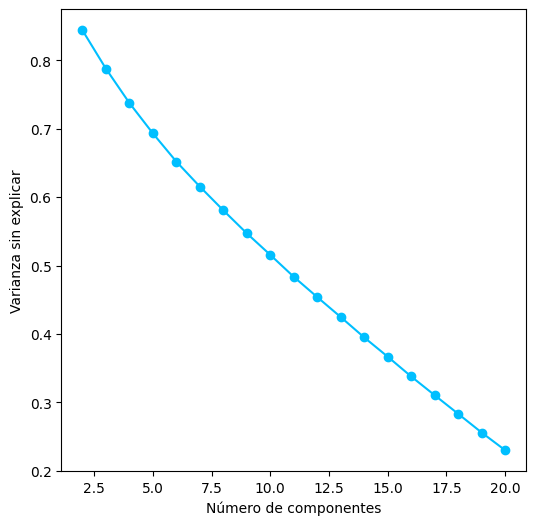

In [45]:
ve_list = []
vne_list = []
n_comp = range(2,21)

for n in n_comp:
    pca = PCA(n_components=n)
    pca.fit(X_train_scaled.reset_index(drop=True))
    ve = pca.explained_variance_ratio_.sum()
    ve_list.append(ve)
    vne = 1-ve
    vne_list.append(vne)
    print(f'Varianza explicada por {n} components: {ve:.5f}')
    
plt.figure(figsize=(6, 6))
plt.plot(n_comp, vne_list, '-o', color='deepskyblue')
plt.xlabel(f'Número de componentes')
plt.ylabel('Varianza sin explicar')
plt.show()

Aún así, proseguimos con nuestro objetivo inicial, el cual era graficar la distribución del dataset en 2 dimensiones, discriminando por la variable objetivo

In [54]:
principalDf = pd.DataFrame(data=pca_array, columns=['PC 1', 'PC 2'])
pcaDf = pd.concat([principalDf, y_train.reset_index(drop=True)], axis = 1)
pcaDf.head()

,PC 1,PC 2,fraud_bool
0,-2.547541,0.422670,0
1,-2.064319,0.371965,0
2,-1.277867,-1.737878,0
3,0.376158,3.145770,0
4,2.513286,-1.916050,0


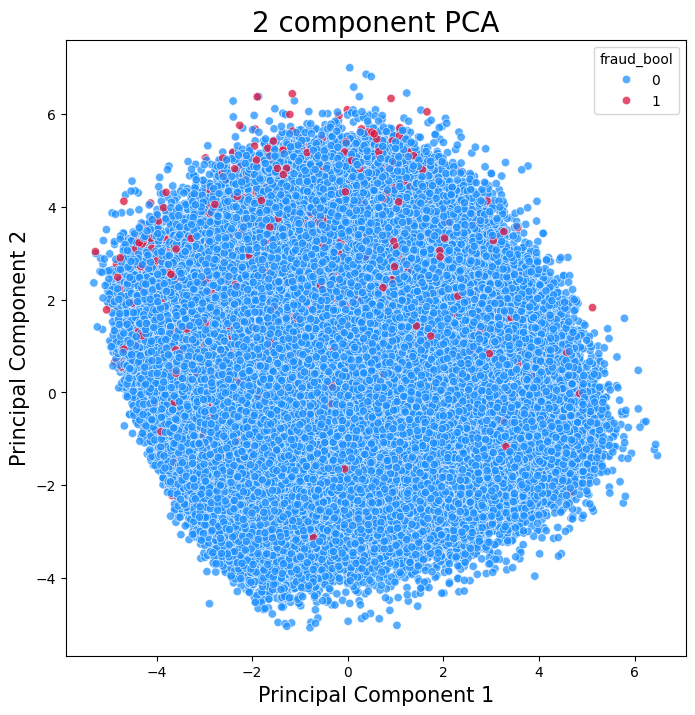

In [55]:
fig, ax = plt.subplots(figsize=(8,8))
sns.scatterplot(data=pcaDf, x='PC 1', y='PC 2', hue='fraud_bool', alpha=0.75, palette=['dodgerblue','crimson'])
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
plt.show()

En esta distribución podríamos intuír que los fraudes tienden levemente a concentrarse en valores mayores a 2 del componente 2. También, aunque en menor medida, en valores menores a 2 del componente 1.

En principio no sería lo más recomendable incluír variables del PCA al mismo tiempo que se mantienen las originales debido a que simplemente incluiríamos ruido, pero en este caso, ya que los componentes se constituyen de muchas variables al mismo tiempo y su varianza explicada conjunta es baja, se podría considerar (al menos a modo de prueba) incluír estas dos columnas en el modelo que seleccionemos, ya que podrían ayudar aportando información.

Si se trata de una regresión, no vería del todo correcto hacerlo por el problema que puede llevar incluír variables con altas correlaciones entre si, pero si se trata de un modelo de árboles por ejemplo, si se podrían considerar. Lo veremos más adelante, en la selección de modelos del próximo notebook. Por el momento guardaré el fit de los 2 componentes en para poder utilizarlo luego.

In [56]:
dump(pca_2c, '../models/pca_2components.joblib')

['../models/pca_2components.joblib']

He elegido el formato .joblib por sobre el .pickle para guardar los modelos de este trabajo debido a que .joblib es un formato específico de SKL
que funciona bastante bien con estos formatos y por ende es más rápido que .pickle para los modelos como este PCA.

## K-Means

Algo similar a lo que sucede con PCA termina sucediendo con K-Means, es decir, no es posible encontrar un número óptimo bajo de clusters como para que valga la pena aplicar el modelo. A continuación la comprobación:

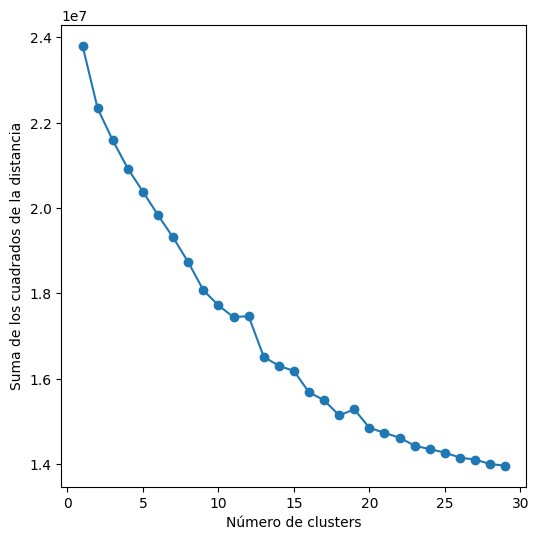

In [57]:
sse = []
list_k = list(range(1, 30))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X_train_scaled)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(f'Número de clusters')
plt.ylabel('Suma de los cuadrados de la distancia');

En este caso volvemos a ver como el gráfico de codo nunca tiene una bajada brusca y un aplanamiento como suele suceder, sino que es constante.

Esto nos hace pensar que no es lo óptimo clusterizar en este análisis.

***

# Feature Selection:

Para llevar a cabo este apartado utilizaré todos los datos que tengo disponibles. Es decir, NO separaré en train y test, al contrario, reunificaré dichos DF. Esto debido a que **NO voy a predecir** nada con estos modelos, sino que simplemente deseo **utilizarlos para seleccionar las variables** que voy a procesar en mis modelos.

In [78]:
X = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])
X.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os_other,device_os_linux,device_os_windows,device_os_macintosh,device_os_x11,keep_alive_session,device_distinct_emails_8w,month
0,0.8,0.433984,54,9,30,0.020608,49.172739,0.0,954,5137.541683,2712.051960,4240.496920,2,11,0.0,286,0,0.0,0,1,1,1,1000.0,0,0,14.396148,1,0,0,0,0,0,1,6
1,0.1,0.712826,-1,97,50,0.024353,-1.091855,1.0,1108,4370.169334,3097.535634,4383.873312,0,6,0.0,132,0,1.0,1,1,28,1,200.0,0,0,4.100053,1,0,0,0,0,0,1,6
2,0.4,0.222290,32,115,30,0.002837,-1.067640,2.0,266,7168.731474,2865.219877,4207.649556,0,11,0.0,171,0,4.0,0,1,-1,1,200.0,0,0,2.369306,1,0,0,0,0,0,1,5
3,0.7,0.476667,-1,375,40,0.020157,-0.930885,2.0,962,4761.030105,6249.502233,6013.337906,0,8,0.0,245,1,0.0,0,1,-1,1,1500.0,1,0,31.700024,0,1,0,0,0,1,1,1
4,0.1,0.506995,11,10,20,0.007662,-0.698526,2.0,874,8823.184279,6315.937497,5653.839202,0,13,3.0,20,0,2.0,0,1,-1,0,200.0,0,0,0.592456,0,1,0,0,0,1,1,2


## Trees

En este caso, incluiré una variable random que me ayude a delimitar que variables son más o menos importantes

In [87]:
np.random.seed(seed)
X['fs_random'] = np.random.randint(1,10000,X.shape[0]) # determino valores totalmente random entre 1 y 1000

In [80]:
X.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os_other,device_os_linux,device_os_windows,device_os_macintosh,device_os_x11,keep_alive_session,device_distinct_emails_8w,month,fs_random
0,0.8,0.433984,54,9,30,0.020608,49.172739,0.0,954,5137.541683,2712.051960,4240.496920,2,11,0.0,286,0,0.0,0,1,1,1,1000.0,0,0,14.396148,1,0,0,0,0,0,1,6,1289
1,0.1,0.712826,-1,97,50,0.024353,-1.091855,1.0,1108,4370.169334,3097.535634,4383.873312,0,6,0.0,132,0,1.0,1,1,28,1,200.0,0,0,4.100053,1,0,0,0,0,0,1,6,7293
2,0.4,0.222290,32,115,30,0.002837,-1.067640,2.0,266,7168.731474,2865.219877,4207.649556,0,11,0.0,171,0,4.0,0,1,-1,1,200.0,0,0,2.369306,1,0,0,0,0,0,1,5,1344
3,0.7,0.476667,-1,375,40,0.020157,-0.930885,2.0,962,4761.030105,6249.502233,6013.337906,0,8,0.0,245,1,0.0,0,1,-1,1,1500.0,1,0,31.700024,0,1,0,0,0,1,1,1,7291
4,0.1,0.506995,11,10,20,0.007662,-0.698526,2.0,874,8823.184279,6315.937497,5653.839202,0,13,3.0,20,0,2.0,0,1,-1,0,200.0,0,0,0.592456,0,1,0,0,0,1,1,2,9372


In [92]:
%%time
clf = RandomForestClassifier(n_estimators=200 # no lo hago tan grande para que no demore tanto. Con 500 demoró demasiado
                             ,criterion='gini'
                             ,max_depth=8 # nunca más de 14. Elegí 8 porque tardaba demasiado con más...
                             ,random_state=seed)
clf.fit(X, y)

CPU times: total: 19min 59s
Wall time: 30min 13s


RandomForestClassifier(max_depth=8, n_estimators=200, random_state=10)

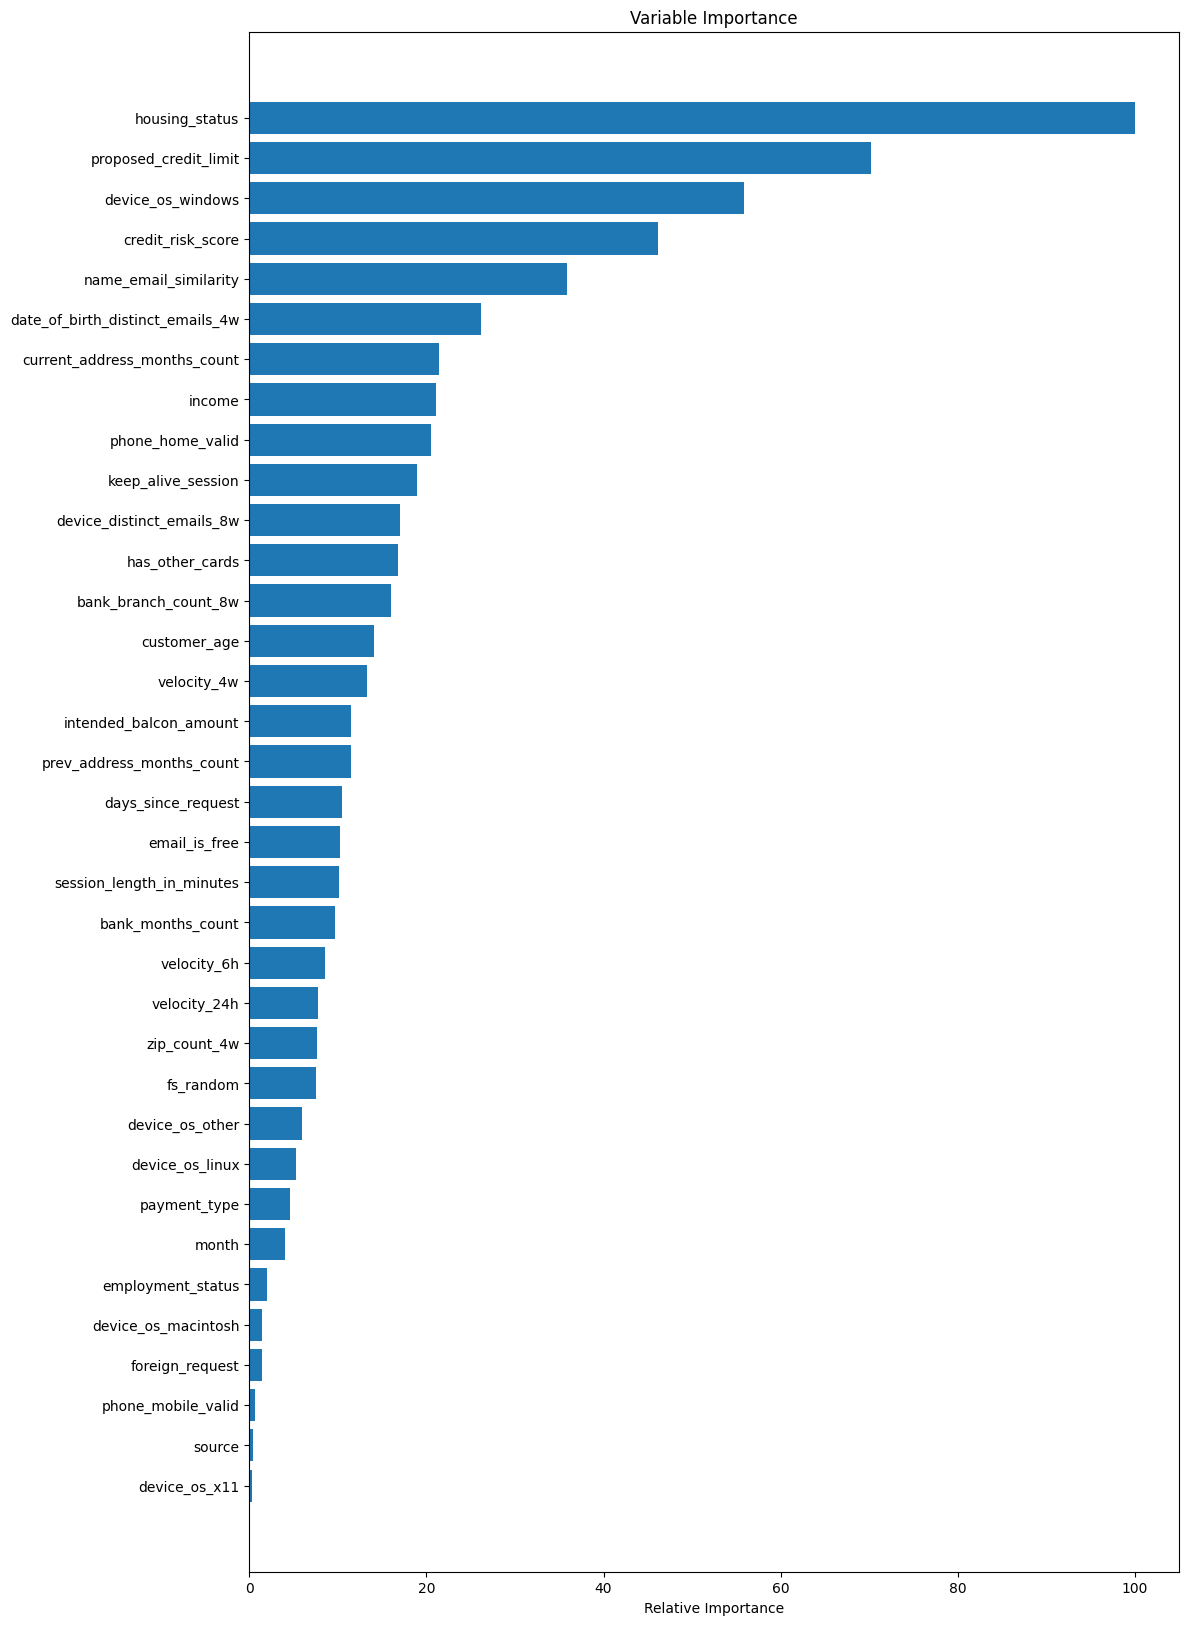

In [93]:
feature_importance = clf.feature_importances_ # Si uso XGBoost, determinar Method=Gain (SI ES SPLIT VA A ELIMINARME LA RANDOM) --> VARIABLE RANDOM DEL 0 AL 10000
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
# plt.subplot(1, 2, 2)
plt.figure(figsize=(12, 20))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.keys()[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

## Regresiones con Regularización

Antes de llevar a cabo estos modelos, procederé a eliminar una de las variables creadas en el OHE, ya que no son n-1 categorías, sino que existe exatamente una variable por categoría y esto podría conllevar a que haya duplicación de información.

En este caso además, aprovechando que vamos a utilizar los escalados, voy a incluír también las variables del PCA para ver que coeficientes obtienen.

### Ridge

In [94]:
X_scaled = pd.concat([X_train_scaled, X_test_scaled])
X_scaled['PCA1'], X_scaled['PCA2'] = pca_2c.transform(X_scaled)[:,0], pca_2c.transform(X_scaled)[:,1]
X_scaled = X_scaled.drop('device_os_other', axis=1)
X_scaled.head()

,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,velocity_6h,velocity_24h,velocity_4w,bank_branch_count_8w,date_of_birth_distinct_emails_4w,employment_status,credit_risk_score,email_is_free,housing_status,phone_home_valid,phone_mobile_valid,bank_months_count,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os_linux,device_os_windows,device_os_macintosh,device_os_x11,keep_alive_session,device_distinct_emails_8w,month,PCA1,PCA2
0,0.816970,-0.206759,0.844254,-0.877809,-0.306848,-0.186839,2.001320,-1.273961,-0.615428,-0.176238,-1.392368,-0.670282,-0.396667,0.297512,-0.473560,2.226026,-1.061572,-1.395809,-0.846388,0.352477,-0.812741,1.866506,0.994196,-0.161050,-0.084107,0.849742,-0.705863,-0.598102,-0.238849,-0.085423,-1.166863,-0.101505,1.227276,-2.547541,0.422670
1,-1.594075,0.757666,-0.402385,0.117574,1.355648,-0.186142,-0.482436,-0.240130,-0.462261,-0.431297,-1.131628,-0.514362,-0.401022,-0.696188,-0.473560,0.014195,-1.061572,-0.607574,1.181492,0.352477,1.415444,1.866506,-0.647578,-0.161050,-0.084107,-0.428877,-0.705863,-0.598102,-0.238849,-0.085423,-1.166863,-0.101505,1.227276,-2.064319,0.371965
2,-0.560770,-0.938937,0.345598,0.321175,-0.306848,-0.190146,-0.481239,0.793702,-1.299705,0.498891,-1.288766,-0.706003,-0.401022,0.297512,-0.473560,0.574334,-1.061572,1.757131,-0.846388,0.352477,-0.977792,1.866506,-0.647578,-0.161050,-0.084107,-0.643810,-0.705863,-0.598102,-0.238849,-0.085423,-1.166863,-0.101505,0.774812,-1.277867,-1.737878
3,0.472535,-0.059132,-0.402385,3.262080,0.524400,-0.186923,-0.474482,0.793702,-0.607471,-0.301383,1.000350,1.257656,-0.401022,-0.298708,-0.473560,1.637162,0.941999,-1.395809,-0.846388,0.352477,-0.977792,1.866506,2.020305,6.209245,-0.084107,2.998622,1.416705,-0.598102,-0.238849,-0.085423,0.856998,-0.101505,-1.035046,0.376158,3.145770
4,-1.594075,0.045763,-0.130391,-0.866497,-1.138096,-0.189248,-0.463000,0.793702,-0.694995,1.048799,1.045287,0.866706,-0.401022,0.694992,1.870709,-1.594410,-1.061572,0.180661,-0.846388,0.352477,-0.977792,-0.535760,-0.647578,-0.161050,-0.084107,-0.864468,1.416705,-0.598102,-0.238849,-0.085423,0.856998,-0.101505,-0.582582,2.513286,-1.916050


In [95]:
sel_ridge = SelectFromModel(LogisticRegression(C=1, penalty='l2'), threshold = 0.075)
sel_ridge.fit(X_scaled, y)
# Si aplicas transform(X_train_scaled, y_train) y transform(X_test_scaled, y_test), filtra las variables seleccionadas 

SelectFromModel(estimator=LogisticRegression(C=1), threshold=0.075)

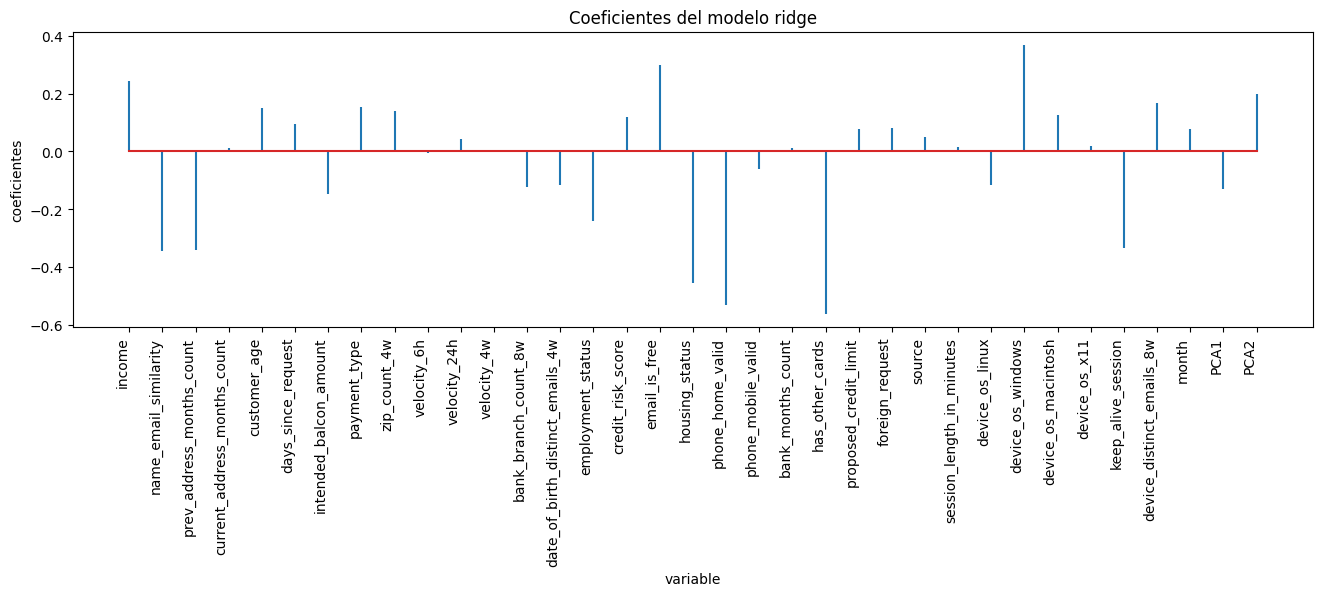

In [96]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes = pd.DataFrame(
                        {'predictor': X_scaled.columns,
                         'coef': sel_ridge.estimator_.coef_.flatten()}
                  )

fig, ax = plt.subplots(figsize=(16, 3.84))
ax.stem(df_coeficientes.predictor, df_coeficientes.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo ridge');

In [114]:
sel_ridge.get_support()
selected_feat = X_scaled.columns[sel_ridge.get_support()]
selected_feat

Index(['income', 'name_email_similarity', 'prev_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'has_other_cards', 'proposed_credit_limit',
       'foreign_request', 'device_os_linux', 'device_os_windows',
       'device_os_macintosh', 'keep_alive_session',
       'device_distinct_emails_8w', 'month', 'PCA1', 'PCA2'],
      dtype='object')

In [115]:
sel_ridge.get_support()

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
        True, False, False,  True,  True,  True, False, False,  True,
        True,  True, False,  True,  True,  True,  True,  True])

In [116]:
print('total features: {}'.format((X_train_scaled.shape[1])))
print('selected features: {}'.format(len(selected_feat)))

total features: 34
selected features: 26


In [117]:
# eliminadas:
X_scaled.columns[~sel_ridge.get_support()]

Index(['current_address_months_count', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'phone_mobile_valid', 'bank_months_count', 'source',
       'session_length_in_minutes', 'device_os_x11'],
      dtype='object')

Bastante de acuerdo, ver que hacer con foreign_request y velocitys

In [101]:
%%time
sel_lasso = SelectFromModel(LogisticRegression(C=1, penalty='l1', solver='liblinear'), threshold = 0.075)
sel_lasso.fit(X_scaled, y)

SelectFromModel(estimator=LogisticRegression(C=1, penalty='l1',
                                             solver='liblinear'),
                threshold=0.075)

In [103]:
sel_lasso.get_support()
selected_feat_lasso = X_scaled.columns[sel_lasso.get_support()]
selected_feat_lasso

Index(['income', 'name_email_similarity', 'prev_address_months_count',
       'customer_age', 'days_since_request', 'intended_balcon_amount',
       'payment_type', 'zip_count_4w', 'bank_branch_count_8w',
       'date_of_birth_distinct_emails_4w', 'employment_status',
       'credit_risk_score', 'email_is_free', 'housing_status',
       'phone_home_valid', 'has_other_cards', 'foreign_request',
       'device_os_linux', 'device_os_windows', 'device_os_macintosh',
       'keep_alive_session', 'device_distinct_emails_8w', 'month', 'PCA1',
       'PCA2'],
      dtype='object')

In [104]:
print('total features: {}'.format((X_scaled.shape[1])))
print('selected features: {}'.format(len(selected_feat_lasso)))

total features: 35
selected features: 25


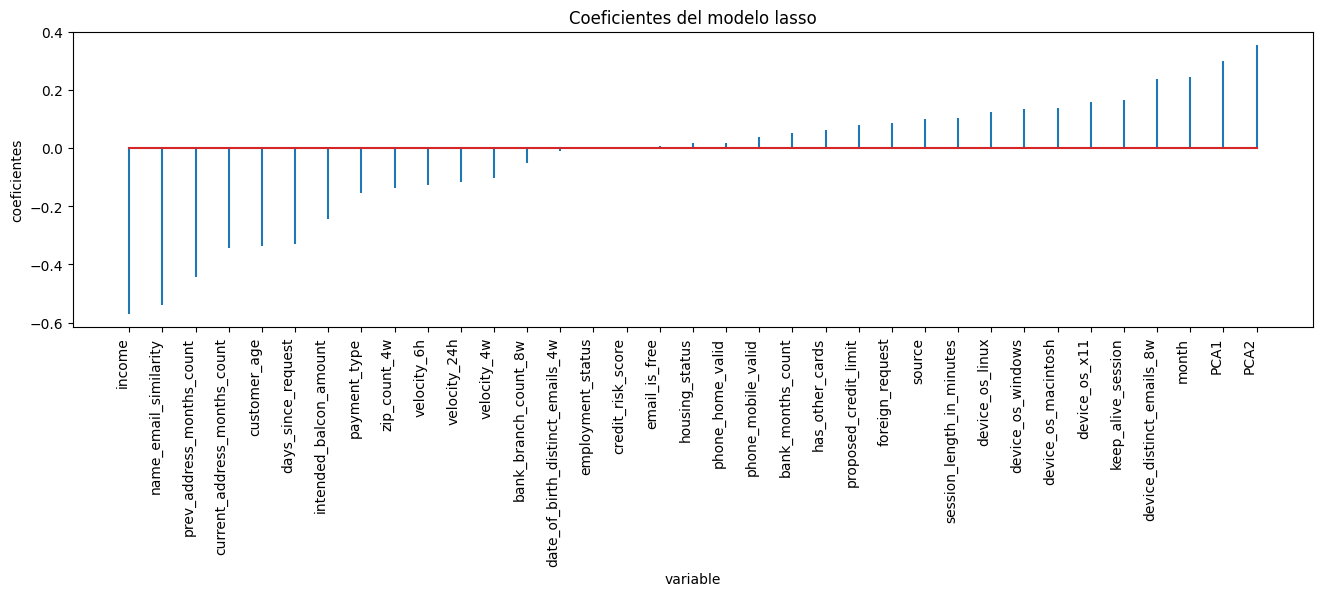

In [112]:
# Coeficientes del modelo
# ==============================================================================
df_coeficientes_lasso = pd.DataFrame(
                        {'predictor': X_scaled.columns,
                         'coef': sorted(sel_lasso.estimator_.coef_.flatten())}
                  )

fig, ax = plt.subplots(figsize=(16, 3.84))
ax.stem(df_coeficientes_lasso.predictor, df_coeficientes_lasso.coef, markerfmt=' ')
plt.xticks(rotation=90, ha='right', size=10)
ax.set_xlabel('variable')
ax.set_ylabel('coeficientes')
ax.set_title('Coeficientes del modelo lasso');

In [118]:
# A eliminar según Lasso:
X_scaled.columns[~sel_lasso.get_support()]

Index(['current_address_months_count', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'phone_mobile_valid', 'bank_months_count',
       'proposed_credit_limit', 'source', 'session_length_in_minutes',
       'device_os_x11'],
      dtype='object')

In [159]:
# A eliminar según Ridge:
X_scaled.columns[~sel_ridge.get_support()]

Index(['current_address_months_count', 'velocity_6h', 'velocity_24h',
       'velocity_4w', 'phone_mobile_valid', 'bank_months_count', 'source',
       'session_length_in_minutes', 'device_os_x11'],
      dtype='object')

In [165]:
# Variables menos importantes según Random Forest:
pd.concat([\
           pd.Series(X.keys()[sorted_idx].values)\
          ,pd.Series(feature_importance[sorted_idx])]\
          ,axis=1).head(15).rename(columns={0:'Variables',1:'Coef importancia'})

,Variables,Coef importancia
0,device_os_x11,0.335105
1,source,0.459529
2,phone_mobile_valid,0.602228
3,foreign_request,1.421972
4,device_os_macintosh,1.491823
5,employment_status,2.049765
6,month,3.983645
7,payment_type,4.608758
8,device_os_linux,5.303725
9,device_os_other,5.995832


### Variables a seleccionar:

En el caso de este DataSet no es tan simple seleccionar variables por varios motivos. En primer lugar, no tenemos un número enorme de variables y de instancias en donde si o si tenemos que reducir la cantidad de atributos a tratar, aunque siempre que se pueda reducir el costo computacional, mejor. Además, algunas de las variables están encodificadas para conservar su anonimato, por lo que nuestro input no son los datos 100% "crudos".

De igual manera, luego de haber aplicado 3 herramientas de selección de variables como lo son el Random Forest, la regresión logística con regularización Rige y la misma pero con Lasso, decidiré recortar el dataset aunque teniendo en cuenta algunas normas que respetaré en el proceso:
- No recortaré variables de manera parcial, es decir, que si una de las variables derivadas del OHE aparece como elimininable pero las demás no, se mantendrá la totalidad de las variables derivadas, ya que estoy seleccionando variables y no particiones.
- Tomaré una postura más bien conservadora, recortando atributos que los 3 métodos me recomienden, o al menos 2 de esos 3. Prefiero quedarme con más variables que con menos.
- Si alguna variable debe ser eliminada según los métodos aplicados pero conceptualmente no lo considero oportuno, también la mantendré, ya que se trata de una decisión relacionada a la lógica y al negocio.
- En los métodos de Lasso y Ridge es clara la eliminación de variables, pero en RF puede parecer un poco más subjetiva. Por ello he incluído una variable que tiene valores totalmente random al análisis. Esto me permite intuír que variables con valores de importancia menores o cercanos a esta misma no estarían sumando mucho al modelo.

Además, en el notebook 4, se comprobará si es mejor utilizar un dataset con todas las variables o con el recorte elegido para tener una doble comprobación.

A continuación se comentarán las variables eliminadas una por una:
1. 'source': Variable seleccionada para su eliminación en los 3 métodos, además de que ya había sido mencionada como una variable con posibilidades de ser eliminada con anterioridad en caso de que no aporte suficiente valor a los modelos.
2. 'velocity_24h' y 'velocity_6h': Ambas muestran tener un valor bajo de importancia en los 3 métodos. Además, mantendré a 'velocity_4h', la cual por cierto tiene cierto índice de correlación con las dos a eliminar, por lo que en principio no estaría perdiendo tanta información.
3. 'phone_mobile_valid': Variable que parece tener poca importancia debido a que los 3 métodos la dieron como eliminable.
4. 'bank_months_count':  Variable que tiene poco valor para los 3 métodos y que además posee un 25% de valores missings, por lo que era plausible a ser eliminada.

Además de este recorte de 5 variables, debo recordar que en el notebook 01 ya se ha eliminado la variable 'device_fraud_count' en el momento en el que se detectó gracias a una función que solo poseía datos de un mismo valor, por lo que no aportaba nada al análisis. Dando así un total de 6 variables a ser recortadas del modelo.

Dicho recorte se realizará directamente en el próximo notebook, antes de la comparación de modelos.

In [175]:
# Resumen informativo de las variables a recortar:
fr.dame_info(var_list=['source','velocity_24h','velocity_6h','phone_mobile_valid', 'bank_months_count'],df=X_train,df_info=var_description)

 1. source  :  Online source of application. Either browser (INTERNET) or app (TELEAPP). 
- Nulls: 0
- Values: [0 1] 

 2. velocity_24h  :  Velocity of total applications made in last 24 hours i.e., average number of applications per hour in the last 24 hours. 
- Nulls: 0
- Range = [1300.31 to 9502.73], Mean = 4770.56

 3. velocity_6h  :  Velocity of total applications made in last 6 hours i.e., average number of applications per hour in the last 6 hours. 
- Nulls: 0
- Range = [-170.60 to 16715.57], Mean = 5667.77

 4. phone_mobile_valid  :  Validity of provided mobile phone. 
- Nulls: 0
- Values: [0 1] 

 5. bank_months_count  :  How old is previous account (if held) in months. 
- Nulls: 0
- Range = [-1.00 to 32.00], Mean = 10.85



***
# Exporto los datasets preparados para el modelado

In [176]:
pd.concat([X_train,y_train], axis=1).to_csv('../data/processed/df_train_ready_to_model.csv', index=False) # luego separaré nuevamente en X e y a la hora de modelar.
pd.concat([X_test,y_test], axis=1).to_csv('../data/processed/df_test_ready_to_model.csv', index=False) # lo mismo aplica para el test, se separará luego para no guardar dos csv separados.